In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [25]:
df = pd.read_csv('careermitra_dataset.csv')

In [3]:
df

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,...,Journals,Work,yes,stubborn,Management,salary,smart worker,yes,no,Technical Engineer
19996,80,69,83,87,82,66,66,92,67,7,...,Cookbooks,salary,no,stubborn,Management,salary,hard worker,no,yes,E-Commerce Analyst
19997,83,70,80,87,64,85,69,94,88,7,...,Drama,Work,yes,gentle,Technical,work,hard worker,no,yes,Business Intelligence Analyst
19998,68,87,91,88,66,74,61,87,61,5,...,Travel,Work,no,gentle,Management,work,smart worker,yes,no,Software Quality Assurance (QA) / Testing


In [4]:
X = df.loc[:, ['Acedamic percentage in Operating Systems', 'percentage in Algorithms','Percentage in Programming Concepts','Percentage in Software Engineering','Percentage in Computer Networks','Percentage in Communication skills','Percentage in Mathematics','Percentage in Computer Architecture','Percentage in Electronics Subjects']]

In [5]:
X

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Communication skills,Percentage in Mathematics,Percentage in Computer Architecture,Percentage in Electronics Subjects
0,69,63,78,87,94,61,84,87,94
1,78,62,73,60,71,91,84,73,70
2,71,86,91,87,61,94,72,72,81
3,76,87,60,84,89,69,88,62,73
4,92,62,90,67,71,73,71,73,89
...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,69,84,90,74
19996,80,69,83,87,82,67,92,66,66
19997,83,70,80,87,64,88,94,69,85
19998,68,87,91,88,66,61,87,61,74


In [6]:
y = df[['Suggested Job Role']]

In [30]:
y

,Suggested Job Role
0,Database Developer
1,Portal Administrator
2,Portal Administrator
3,Systems Security Administrator
4,Business Systems Analyst
...,...
19995,Technical Engineer
19996,E-Commerce Analyst
19997,Business Intelligence Analyst
19998,Software Quality Assurance (QA) / Testing


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded = np.array(y_encoded, dtype=np.float32)

C:\Users\HP\Desktop\sample_project_2\env\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
y_encoded

array([ 7., 18., 18., ...,  1., 24.,  0.], dtype=float32)

In [36]:
num_classes = len(np.unique(y_encoded))

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
X_train_scaled

array([[ 0.1964467 ,  0.50038031,  1.28216126, ..., -0.48854651,
        -0.11366075, -0.2931953 ],
       [ 1.19122148,  0.50038031, -0.5907891 , ...,  0.89587816,
         0.78405472, -0.2931953 ],
       [-1.69362538, -1.08361638, -0.68936543, ..., -1.08187137,
         0.88380089, -0.09678244],
       ...,
       [ 0.59435661,  1.39137845,  1.18358492, ...,  0.89587816,
         0.68430856, -1.56987891],
       [ 0.59435661, -1.28161597,  0.49355058, ..., -1.08187137,
        -0.21340692,  0.29604329],
       [ 0.09696922,  1.09437907, -1.57655244, ..., -0.48854651,
        -1.51010705,  1.27810761]])

In [39]:
print(y_encoded[:5])
print("Shape:", y_encoded.shape)
print("Unique:", np.unique(y_encoded))

[ 7. 18. 18. 28.  2.]
Shape: (20000,)
Unique: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.]


In [40]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(9,)),  
    BatchNormalization(),  
    Dense(128, activation='relu'),  
    BatchNormalization(),  
    Dense(128, activation='relu'),  
    Dropout(0.3),  
    Dense(64, activation='relu'),  
    BatchNormalization(),  
    Dense(64, activation='relu'),  
    Dropout(0.3),  
    Dense(32, activation='relu'),  
    Dense(num_classes, activation='softmax')  # Output layer (unchanged)
])

C:\Users\HP\Desktop\sample_project_2\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
X_train_scaled

(14000, 9)

In [45]:
history = model.fit(X_train_scaled, y_encoded, 
                    epochs=20, 
                    batch_size=4, 
                    validation_split=0.2)

Epoch 1/20
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.0542 - loss: 3.5295 - val_accuracy: 0.0486 - val_loss: 3.5288
Epoch 2/20
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0567 - loss: 3.5236 - val_accuracy: 0.0486 - val_loss: 3.5296
Epoch 3/20
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0541 - loss: 3.5239 - val_accuracy: 0.0486 - val_loss: 3.5360
Epoch 4/20
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0533 - loss: 3.5266 - val_accuracy: 0.0486 - val_loss: 3.5276
Epoch 5/20
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0521 - loss: 3.5265 - val_accuracy: 0.0486 - val_loss: 3.5274
Epoch 6/20
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0526 - loss: 3.5247 - val_accuracy: 0.0486 - val_loss: 3.5265
Epoch 7/20
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0568 - loss: 3.5230 - val_accuracy: 0.0486 - val_loss: 3.5268
Epoch 8/20
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0559 - loss: 3.5237 -

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 34)                  │           1,122 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 202,760 (792.04 KB)

 Trainable params: 67,586 (264.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 135,174 (528.03 KB)

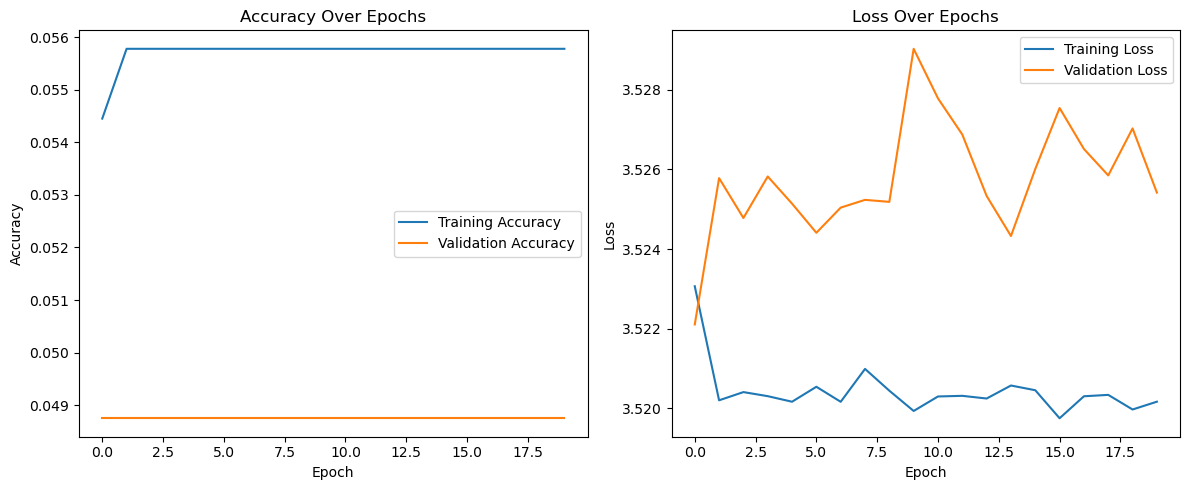

In [16]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

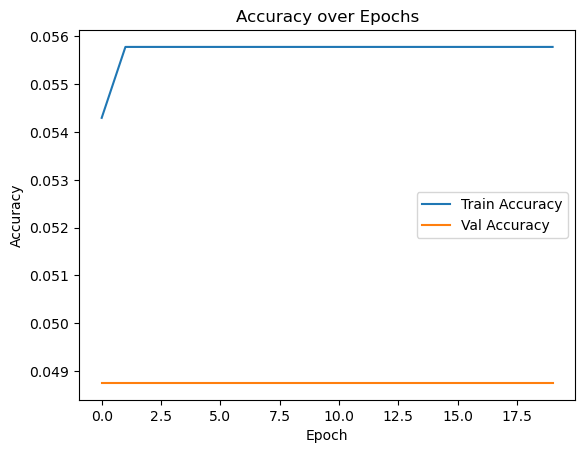

In [74]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()